# 🎬 Jaipur Climate Analysis

This notebook analyzes climate-related data from a Kaggle dataset. We'll cover:
- 📂 Loading and exploring the data
- 🧹 Data cleaning
- 🔎 Filtering and sorting
- 📊 Aggregation and grouping
- 📈 Visualizations and insights


In [46]:
import zipfile
import os

# Unzip the dataset
zip_path = '/content/archive (3).zip'


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the files extracted
for file in os.listdir(extract_path):
    print(file)


JaipurFinalCleanData.csv
JaipurRawData3.csv


## 📥 Load the Dataset


In [47]:
import pandas as pd

df = pd.read_csv('/mnt/data/cinema_data/JaipurRawData3.csv')
df.head()

,date,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
0,2016-05-01,34,-1,1005.63,24,4,43,26,9,-10,1009,999,0.0
1,2016-05-02,36,4,1005.46,21,6,43,29,10,-2,1008,1001,0.0
2,2016-05-03,35,6,1006.00,27,5,41,29,12,-2,1009,1000,0.0
3,2016-05-04,34,7,1005.65,29,6,41,27,13,0,1008,1001,0.0
4,2016-05-05,31,11,1007.94,61,13,38,24,16,6,1011,1003,5.0


## 🧠 1. Basic Data Exploration (15 Functions)


In [8]:
print("1. Shape:", df.shape)

1. Shape: (679, 13)


In [9]:
print("2. Columns:", df.columns.tolist())

2. Columns: ['date', 'meantempm', 'meandewptm', 'meanpressurem', 'maxhumidity', 'minhumidity', 'maxtempm', 'mintempm', 'maxdewptm', 'mindewptm', 'maxpressurem', 'minpressurem', 'precipm']


In [10]:
print("3. Info:")
df.info()

3. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           679 non-null    object 
 1   meantempm      679 non-null    int64  
 2   meandewptm     679 non-null    int64  
 3   meanpressurem  679 non-null    float64
 4   maxhumidity    679 non-null    int64  
 5   minhumidity    679 non-null    int64  
 6   maxtempm       679 non-null    int64  
 7   mintempm       679 non-null    int64  
 8   maxdewptm      679 non-null    int64  
 9   mindewptm      679 non-null    int64  
 10  maxpressurem   679 non-null    int64  
 11  minpressurem   679 non-null    int64  
 12  precipm        679 non-null    float64
dtypes: float64(2), int64(10), object(1)
memory usage: 69.1+ KB


In [11]:
print("\n4. Null values:\n", df.isnull().sum())


4. Null values:
 date             0
meantempm        0
meandewptm       0
meanpressurem    0
maxhumidity      0
minhumidity      0
maxtempm         0
mintempm         0
maxdewptm        0
mindewptm        0
maxpressurem     0
minpressurem     0
precipm          0
dtype: int64


In [12]:
print("\n5. Duplicates:", df.duplicated().sum())


5. Duplicates: 0


In [13]:
print("\n6. Describe:\n", df.describe())


6. Describe:
         meantempm  meandewptm  meanpressurem  maxhumidity  minhumidity  \
count  679.000000  679.000000     679.000000   679.000000   679.000000   
mean    26.092784   11.951399    1009.493417    67.265096    22.742268   
std      6.223843    8.738194       6.472317    22.159195    19.363085   
min     10.000000  -10.000000     997.630000    15.000000     4.000000   
25%     20.000000    5.000000    1003.715000    50.000000     9.000000   
50%     28.000000   10.000000    1008.810000    66.000000    15.000000   
75%     30.000000   21.000000    1015.510000    88.000000    33.000000   
max     38.000000   26.000000    1023.430000   100.000000    89.000000   

         maxtempm    mintempm   maxdewptm   mindewptm  maxpressurem  \
count  679.000000  679.000000  679.000000  679.000000    679.000000   
mean    32.567010   19.667158   16.147275    7.438881   1012.240059   
std      6.010402    6.833975    7.235735   11.694565      6.520884   
min     18.000000    3.000000    0

In [14]:
print("\n7. Sample:\n", df.sample(5))


7. Sample:
            date  meantempm  meandewptm  meanpressurem  maxhumidity  \
69   2016-07-09         32          24         998.33           89   
74   2016-07-14         30          26        1000.84           91   
595  2017-12-18         18          -2        1021.69           41   
349  2017-04-15         34           1        1005.69           30   
357  2017-04-23         34           8        1005.52           29   

     minhumidity  maxtempm  mintempm  maxdewptm  mindewptm  maxpressurem  \
69            35        38        26         25         22          1000   
74            60        33        26         26         25          1003   
595           10        25        12          1         -7          1024   
349            4        42        25          8        -10          1014   
357            9        39        28         11          5          1009   

     minpressurem  precipm  
69            994      0.7  
74            997      0.6  
595          1012     

In [15]:
print("\n8. Head:\n", df.head())


8. Head:
          date  meantempm  meandewptm  meanpressurem  maxhumidity  minhumidity  \
0  2016-05-01         34          -1        1005.63           24            4   
1  2016-05-02         36           4        1005.46           21            6   
2  2016-05-03         35           6        1006.00           27            5   
3  2016-05-04         34           7        1005.65           29            6   
4  2016-05-05         31          11        1007.94           61           13   

   maxtempm  mintempm  maxdewptm  mindewptm  maxpressurem  minpressurem  \
0        43        26          9        -10          1009           999   
1        43        29         10         -2          1008          1001   
2        41        29         12         -2          1009          1000   
3        41        27         13          0          1008          1001   
4        38        24         16          6          1011          1003   

   precipm  
0      0.0  
1      0.0  
2      0.0  

In [16]:
print("\n9. Tail:\n", df.tail())


9. Tail:
            date  meantempm  meandewptm  meanpressurem  maxhumidity  \
674  2018-03-07         24           2        1014.07           55   
675  2018-03-08         24           1        1014.41           42   
676  2018-03-09         26           3        1014.16           37   
677  2018-03-10         26           4        1013.76           38   
678  2018-03-11         26           3        1013.00           46   

     minhumidity  maxtempm  mintempm  maxdewptm  mindewptm  maxpressurem  \
674            5        32        15          8         -6          1017   
675            7        32        15          5         -5          1017   
676            8        33        19          6         -1          1017   
677            6        34        19          8          0          1017   
678            6        34        18         10         -3          1016   

     minpressurem  precipm  
674          1011      0.0  
675          1011      0.0  
676          1009      0

In [17]:
print("\n10. Data types:\n", df.dtypes)


10. Data types:
 date              object
meantempm          int64
meandewptm         int64
meanpressurem    float64
maxhumidity        int64
minhumidity        int64
maxtempm           int64
mintempm           int64
maxdewptm          int64
mindewptm          int64
maxpressurem       int64
minpressurem       int64
precipm          float64
dtype: object


In [18]:
print("\n11. Unique values per column:\n", df.nunique())


11. Unique values per column:
 date             679
meantempm         28
meandewptm        34
meanpressurem    592
maxhumidity       75
minhumidity       75
maxtempm          29
mintempm          30
maxdewptm         30
mindewptm         45
maxpressurem      28
minpressurem      29
precipm           38
dtype: int64


In [19]:
print("\n12. Memory usage:")


12. Memory usage:


In [20]:
print(df.memory_usage(deep=True))

Index              132
date             45493
meantempm         5432
meandewptm        5432
meanpressurem     5432
maxhumidity       5432
minhumidity       5432
maxtempm          5432
mintempm          5432
maxdewptm         5432
mindewptm         5432
maxpressurem      5432
minpressurem      5432
precipm           5432
dtype: int64


In [23]:
print("\n13. Value counts (for a column like 'genre'):\n", df['meantempm'].value_counts())


13. Value counts (for a column like 'genre'):
 meantempm
28    86
30    84
18    59
32    44
26    41
20    39
34    36
22    33
24    31
16    28
36    26
29    18
19    17
27    16
35    15
31    15
25    14
17    13
33    12
38    10
23    10
21     9
14     8
15     7
12     4
37     2
10     1
13     1
Name: count, dtype: int64


In [24]:
print("\n14. Correlation matrix:\n", df.corr(numeric_only=True))


14. Correlation matrix:
                meantempm  meandewptm  meanpressurem  maxhumidity  minhumidity  \
meantempm       1.000000    0.495484      -0.813205    -0.267657     0.073509   
meandewptm      0.495484    1.000000      -0.751548     0.641548     0.810620   
meanpressurem  -0.813205   -0.751548       1.000000    -0.154698    -0.469749   
maxhumidity    -0.267657    0.641548      -0.154698     1.000000     0.771550   
minhumidity     0.073509    0.810620      -0.469749     0.771550     1.000000   
maxtempm        0.959341    0.301913      -0.687048    -0.423955    -0.148960   
mintempm        0.969006    0.630189      -0.870923    -0.119428     0.259489   
maxdewptm       0.597048    0.964724      -0.802735     0.567252     0.732649   
mindewptm       0.416860    0.896702      -0.640350     0.560717     0.760921   
maxpressurem   -0.783750   -0.761062       0.985266    -0.187275    -0.496278   
minpressurem   -0.847609   -0.705123       0.975197    -0.081461    -0.389886   
pr

In [25]:
print("\n15. Skewness:\n", df.skew(numeric_only=True))



15. Skewness:
 meantempm       -0.221259
meandewptm       0.166968
meanpressurem    0.051799
maxhumidity     -0.061105
minhumidity      1.267291
maxtempm        -0.042197
mintempm        -0.323495
maxdewptm        0.044008
mindewptm       -1.759458
maxpressurem    -0.015295
minpressurem     0.134998
precipm          6.446351
dtype: float64


## 🧼 2. Data Cleaning


In [26]:
df.drop_duplicates(inplace=True)

In [27]:
# Fill missing numerical columns with median
df.fillna(df.median(numeric_only=True), inplace=True)


In [28]:
# Drop columns with >50% missing values
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)


## 🔍 3. Data Filtering


In [29]:
print(df.columns.tolist())


['date', 'meantempm', 'meandewptm', 'meanpressurem', 'maxhumidity', 'minhumidity', 'maxtempm', 'mintempm', 'maxdewptm', 'mindewptm', 'maxpressurem', 'minpressurem', 'precipm']


In [31]:
# Filter rows where maximum temperature is greater than 35°C
hot_days = df[df['maxtempm'] > 35]
hot_days.head()


,date,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
0,2016-05-01,34,-1,1005.63,24,4,43,26,9,-10,1009,999,0.0
1,2016-05-02,36,4,1005.46,21,6,43,29,10,-2,1008,1001,0.0
2,2016-05-03,35,6,1006.00,27,5,41,29,12,-2,1009,1000,0.0
3,2016-05-04,34,7,1005.65,29,6,41,27,13,0,1008,1001,0.0
4,2016-05-05,31,11,1007.94,61,13,38,24,16,6,1011,1003,5.0


In [32]:
# Filter rows where precipitation was recorded
rainy_days = df[df['precipm'] > 0]
rainy_days.head()


,date,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
4,2016-05-05,31,11,1007.94,61,13,38,24,16,6,1011,1003,5.0
8,2016-05-09,34,11,1005.75,45,7,42,27,16,7,1008,1000,0.3
9,2016-05-10,34,16,1007.10,51,12,41,27,18,13,1010,1002,0.8
10,2016-05-11,32,16,1006.78,66,16,40,25,22,10,1011,1001,2.0
11,2016-05-12,34,13,1003.83,58,9,42,27,20,10,1007,998,0.3


In [33]:
# Filter rows with low minimum humidity
dry_days = df[df['minhumidity'] < 20]
dry_days.head()


,date,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
0,2016-05-01,34,-1,1005.63,24,4,43,26,9,-10,1009,999,0.0
1,2016-05-02,36,4,1005.46,21,6,43,29,10,-2,1008,1001,0.0
2,2016-05-03,35,6,1006.00,27,5,41,29,12,-2,1009,1000,0.0
3,2016-05-04,34,7,1005.65,29,6,41,27,13,0,1008,1001,0.0
4,2016-05-05,31,11,1007.94,61,13,38,24,16,6,1011,1003,5.0


## 🔃 4. Data Sorting


In [34]:
# Sort data by maximum temperature in descending order
sorted_temp = df.sort_values(by='maxtempm', ascending=False)
sorted_temp.head()


,date,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
19,2016-05-20,38,10,997.92,38,4,46,30,18,0,1001,992,0.0
18,2016-05-19,38,6,998.96,33,4,46,29,13,-2,1002,994,0.0
17,2016-05-18,36,11,999.88,45,5,45,27,17,6,1002,994,0.0
20,2016-05-21,38,12,998.41,30,6,45,32,17,3,1001,992,0.0
35,2016-06-05,38,6,1003.88,27,4,45,31,16,0,1007,998,0.0


In [35]:
# Ensure 'date' column is datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date
sorted_date = df.sort_values(by='date')
sorted_date.head()


,date,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
0,2016-05-01,34,-1,1005.63,24,4,43,26,9,-10,1009,999,0.0
1,2016-05-02,36,4,1005.46,21,6,43,29,10,-2,1008,1001,0.0
2,2016-05-03,35,6,1006.00,27,5,41,29,12,-2,1009,1000,0.0
3,2016-05-04,34,7,1005.65,29,6,41,27,13,0,1008,1001,0.0
4,2016-05-05,31,11,1007.94,61,13,38,24,16,6,1011,1003,5.0


In [36]:
# Sort by highest precipitation first
sorted_rain = df.sort_values(by='precipm', ascending=False)
sorted_rain.head()


,date,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
145,2016-09-23,28,21,1006.43,83,36,34,22,23,18,1009,1001,57.0
76,2016-07-16,26,26,1002.31,100,82,28,24,27,24,1005,998,51.0
478,2017-08-23,29,24,1005.06,100,53,34,24,26,23,1007,1002,49.0
448,2017-07-23,26,26,997.67,100,88,29,24,27,25,1000,995,47.0
88,2016-07-28,28,25,1003.98,100,66,32,24,26,24,1006,1001,36.0


## 📊 5. Data Aggregation


In [37]:
# Add month column
df['month'] = df['date'].dt.month

# Group by month and get average max temperature
monthly_avg_temp = df.groupby('month')['maxtempm'].mean()
monthly_avg_temp


,maxtempm
month,
1,23.467742
2,27.660714
3,32.190476
4,39.233333
5,41.258065
6,39.533333
7,33.721311
8,31.951613
9,34.783333


In [38]:
# Add year column
df['year'] = df['date'].dt.year

# Group by year and sum rainfall
yearly_rain = df.groupby('year')['precipm'].sum()
yearly_rain


,precipm
year,
2016,456.7
2017,386.7
2018,2.0


In [39]:
monthly_humidity = df.groupby('month')[['maxhumidity', 'minhumidity']].mean()
monthly_humidity


,maxhumidity,minhumidity
month,,
1,79.709677,19.080645
2,61.357143,12.607143
3,54.642857,9.642857
4,30.433333,5.233333
5,44.241935,9.419355
6,63.983333,21.483333
7,88.459016,50.786885
8,95.145161,57.516129
9,80.066667,30.950000


## 📈 6. Data Visualizations


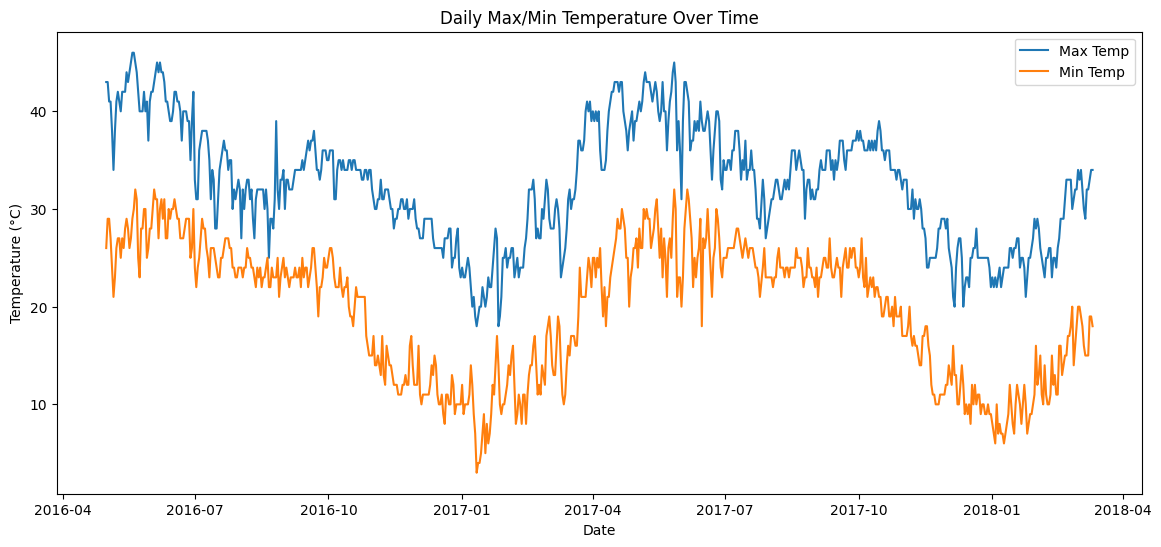

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='maxtempm', label='Max Temp')
sns.lineplot(data=df, x='date', y='mintempm', label='Min Temp')
plt.title("Daily Max/Min Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


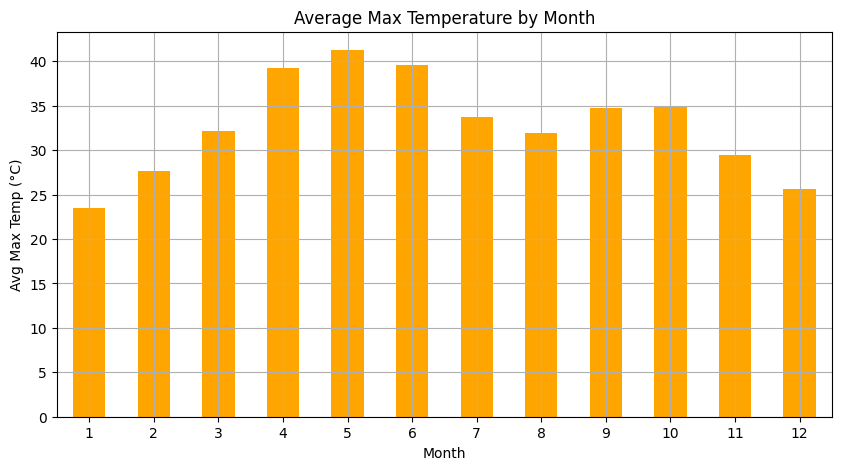

In [41]:
monthly_avg_temp.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Average Max Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Avg Max Temp (°C)")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


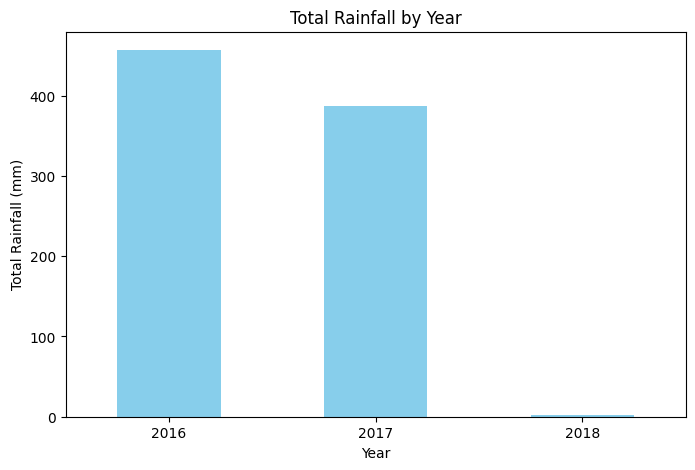

In [42]:
yearly_rain.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Total Rainfall by Year")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.xticks(rotation=0)
plt.show()


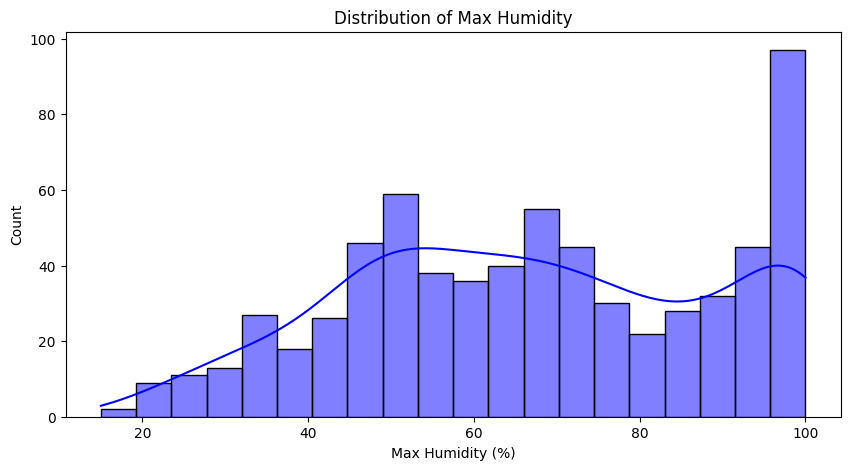

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(df['maxhumidity'], bins=20, color='blue', kde=True)
plt.title("Distribution of Max Humidity")
plt.xlabel("Max Humidity (%)")
plt.show()


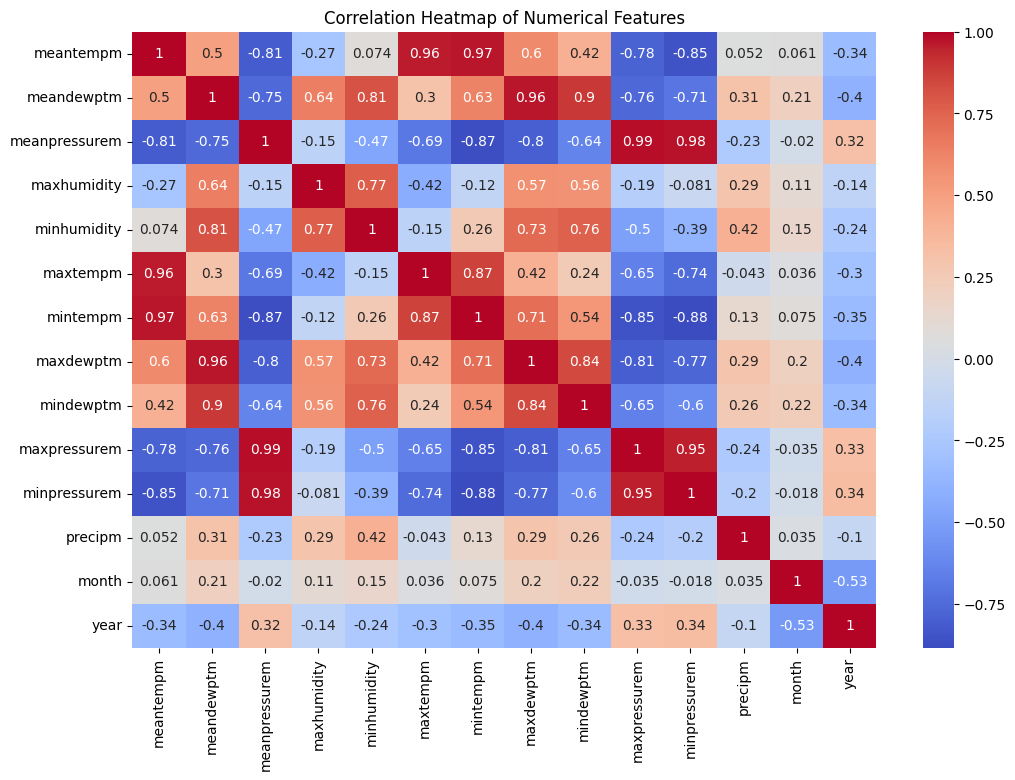

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
